In [14]:
import yfinance as yf

ticker = "BTC-USD"
btc = yf.download(ticker, period="5y", interval="1d")

btc.to_csv("data/btc-5y-1d")

/tmp/ipykernel_61652/426764602.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd
import numpy as np
btc_data = pd.read_csv("data/btc-5y-1d.csv")

print(btc_data.columns)

for col in btc_data.columns:
    if col != 'Date':
        btc_data[col] = btc_data[col].astype(float)
#btc_data['Change'] = np.diff(btc_data['Close'])/btc_data['Close'][:-1]
#btc_data.to_csv("data/btc-5y-1d.csv", index=False)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Change'], dtype='object')


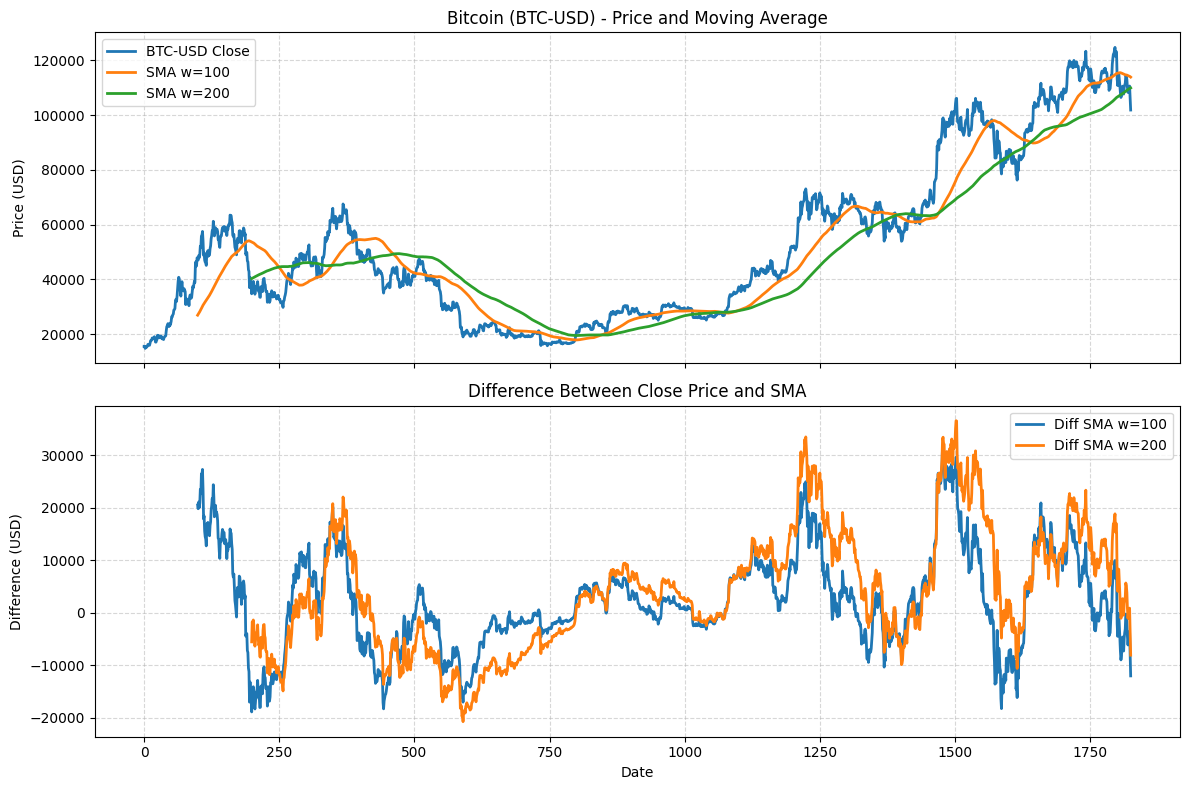

In [4]:
import matplotlib.pyplot as plt
from src.TimeSeriesAnalyser import TimeSeriesAnalyser as TSA

WINDOW_SIZES = [100, 200]

for window in WINDOW_SIZES:
    btc_data[f"SMA: {window}"] = TSA.SMA(btc_data['Close'], window)
    btc_data[f"DIFF SMA: {window}"] = btc_data['Close'] - btc_data[f"SMA: {window}"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(btc_data.index, btc_data["Close"], label="BTC-USD Close", linewidth=2)
for window in WINDOW_SIZES:
    ax1.plot(btc_data.index, btc_data[f"SMA: {window}"], label=f"SMA w={window}", linewidth=2)

ax1.set_title("Bitcoin (BTC-USD) - Price and Moving Average")
ax1.set_ylabel("Price (USD)")
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.legend()

for window in WINDOW_SIZES:
    ax2.plot(btc_data.index, btc_data[f"DIFF SMA: {window}"], label=f"Diff SMA w={window}", linewidth=2)

ax2.set_title("Difference Between Close Price and SMA")
ax2.set_xlabel("Date")
ax2.set_ylabel("Difference (USD)")
ax2.grid(True, linestyle="--", alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()


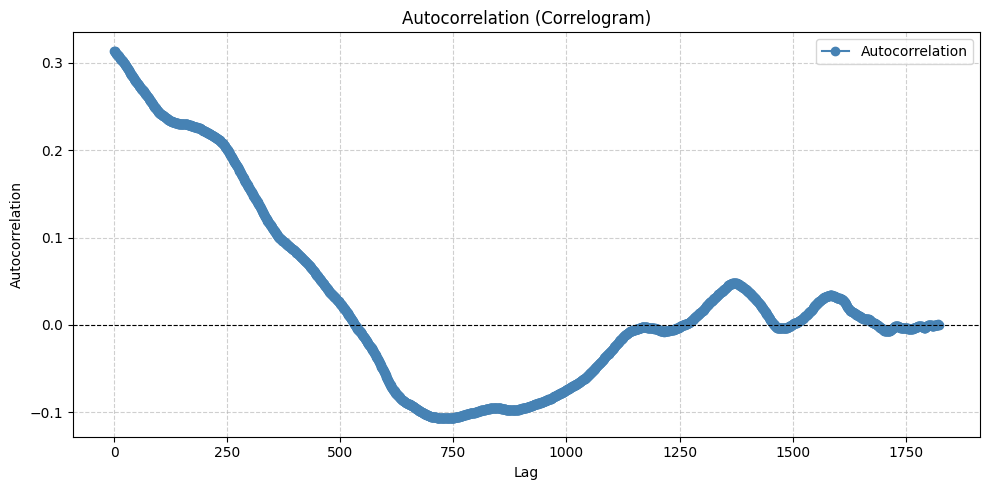

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from src.TimeSeriesAnalyser import TimeSeriesAnalyser as TSA

data = btc_data['Close'].values.astype(float)
result_ = TSA.AutoCorrelationAnalysis(data, 100)

plt.figure(figsize=(10, 5))
lags = np.arange(len(result_))

# Line plot instead of bars
plt.plot(lags, result_, marker='o', linestyle='-', color='steelblue', label='Autocorrelation')

# Reference line at 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.title("Autocorrelation (Correlogram)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [1]:
from src.TimeSeriesAnalyser import TimeSeriesAnalyser as TSA


_close_data = btc_data['Close']

_mean = TSA.Mean(_close_data)
_variance = TSA.Variance(_close_data)
_std_deviation = TSA.StandardDeviation(_close_data)

print(
    f"--BTC--\nMEAN: {_mean}\nVAR: {_variance}\nSTD_DEV: {_std_deviation}"
)

NameError: name 'btc_data' is not defined

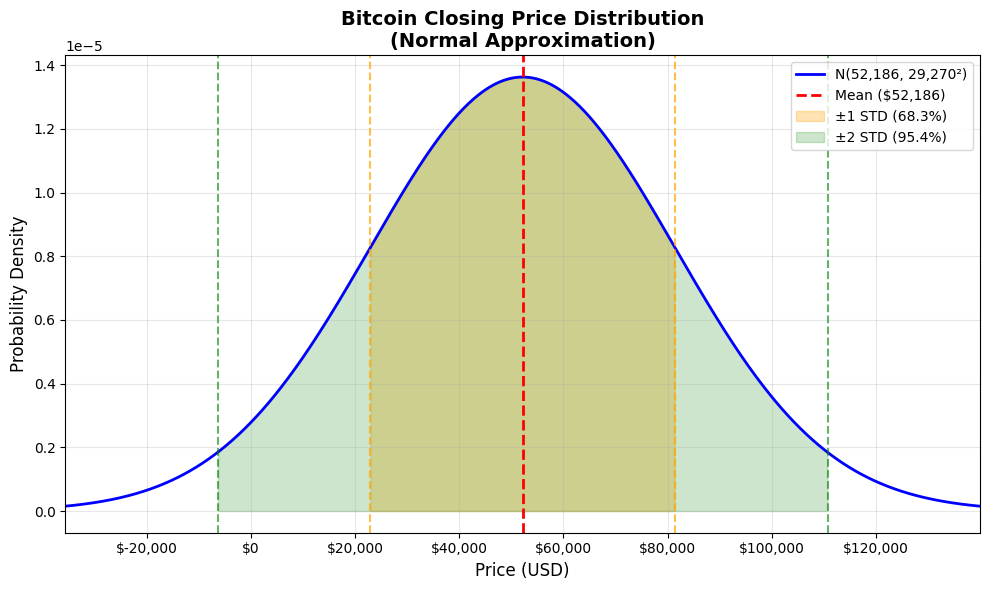

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
_std_dev = _std_deviation


_coefficient_of_variance = 

plt.figure(figsize=(10, 6))

x = np.linspace(_mean - 4*_std_dev, _mean + 4*_std_dev, 1000)

y = norm.pdf(x, _mean, _std_dev)

plt.plot(x, y, 'b-', linewidth=2, label=f'N({_mean:,.0f}, {_std_dev:,.0f}²)')

plt.axvline(_mean, color='red', linestyle='--', linewidth=2, label=f'Mean (${_mean:,.0f})')

plt.axvline(_mean + _std_dev, color='orange', linestyle='--', alpha=0.7)
plt.axvline(_mean - _std_dev, color='orange', linestyle='--', alpha=0.7)
plt.axvline(_mean + 2*_std_dev, color='green', linestyle='--', alpha=0.6)
plt.axvline(_mean - 2*_std_dev, color='green', linestyle='--', alpha=0.6)

plt.fill_between(x, y, where=(x >= _mean - _std_dev) & (x <= _mean + _std_dev), 
                 alpha=0.3, color='orange', label='±1 STD (68.3%)')
plt.fill_between(x, y, where=(x >= _mean - 2*_std_dev) & (x <= _mean + 2*_std_dev), 
                 alpha=0.2, color='green', label='±2 STD (95.4%)')


plt.title('Bitcoin Closing Price Distribution\n(Normal Approximation)', fontsize=14, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xlim(_mean - 3*_std_dev, _mean + 3*_std_dev)

plt.tight_layout()
plt.show()